# Large test project on data processing and visualization

## Review

You are planning to watch a movie. Can you trust online movie ratings and reviews? *Especially* if the company doing the ratings and reviews *also* makes money from selling movie tickets. Do such companies tend to over- or under-rate their ratings?

### Objective of the project:

**The goal of the project is to follow the steps based on the fivethirtyeight.com article about ratings and see if we can come to the same conclusions as in the article. You will use your pandas and data visualization skills to determine whether Fandango was providing inflated ratings in 2015 in order to sell more tickets.**

---
---

**Follow the steps written in bold.**

---
----

## Part 1: Exploring the data


**ASSIGNMENT (OPTIONAL): This assignment is optional, but if you know English well, then read this article, based on which our project is based: [Be Suspicious Of Online Movie Ratings, Especially Fandango's](http://fivethirtyeight .com/features/fandango-movies-ratings/)**

----

**TASK: Read the description of the two .csv files that we will further download and process:**

### Data

The source data for the article [Be Suspicious Of Online Movie Ratings, Especially Fandango's](http://fivethirtyeight.com/features/fandango-movies-ratings/) is freely available at the following github link: https://github.com /fivethirtyeight/data. These are two csv files. One file contains ratings data from Fandango, and the other file contains aggregated ratings data from other companies such as Metacritic, IMDB, and Rotten Tomatoes.

#### all_sites_scores.csv

-----

The `all_sites_scores.csv` file contains all movies that have a Rotten Tomatoes score, RT User score, Metacritic score, Metacritic User score, and IMDb score, as well as at least 30 fan reviews on Fandango. Fandango data was uploaded on August 24, 2015.

Колонка | Определение
--- | -----------
FILM | Название фильма
RottenTomatoes | Оценка "Rotten Tomatoes Tomatometer" для этого фильма
RottenTomatoes_User | Оценка "Rotten Tomatoes user" для этого фильма
Metacritic | Оценка "Metacritic" для этого фильма
Metacritic_User | Оценка "Metacritic user" для этого фильма
IMDB | Оценка "IMDb user" для этого фильма
Metacritic_user_vote_count | Количество голосов за этот фильм от пользователей Metacritic
IMDB_user_vote_count | Количество голосов за этот фильм от пользователей IMDb

----
----

#### fandango_scape.csv

The film `fandango_scrape.csv` contains data about films that the authors of the article downloaded from Fandango.

Column | Definition
--- | ---------
FILM | Movie title
STARS | Number of stars on Fandango.com
RATING | Fandango rating is the value read from the HTML page. This is an average rating for the film.
VOTES | The number of votes of users who wrote a review about the film (at the time of data upload).

----

**TASK: Import libraries that you think you might need:**

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


## Part 2: Comparing Fandango ratings and other user ratings

First, let's take a look at Fandango's ratings and see if our analysis matches the findings in the article.

**ACTIVITY: Complete the cell below to download the fandango_scrape.csv file**

In [2]:
fandango = pd.read_csv("fandango_scrape.csv")

**Task: Examine the properties of the resulting DataFrame object - print the first few lines, as well as general information.**

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


**TASK: Let's study the relationship between the popularity of a film and its rating. Draw a scatterplot showing the relationship between the RATING and VOTES columns. You can change the style of the chart to your liking.**

<Axes: xlabel='RATING', ylabel='VOTES'>

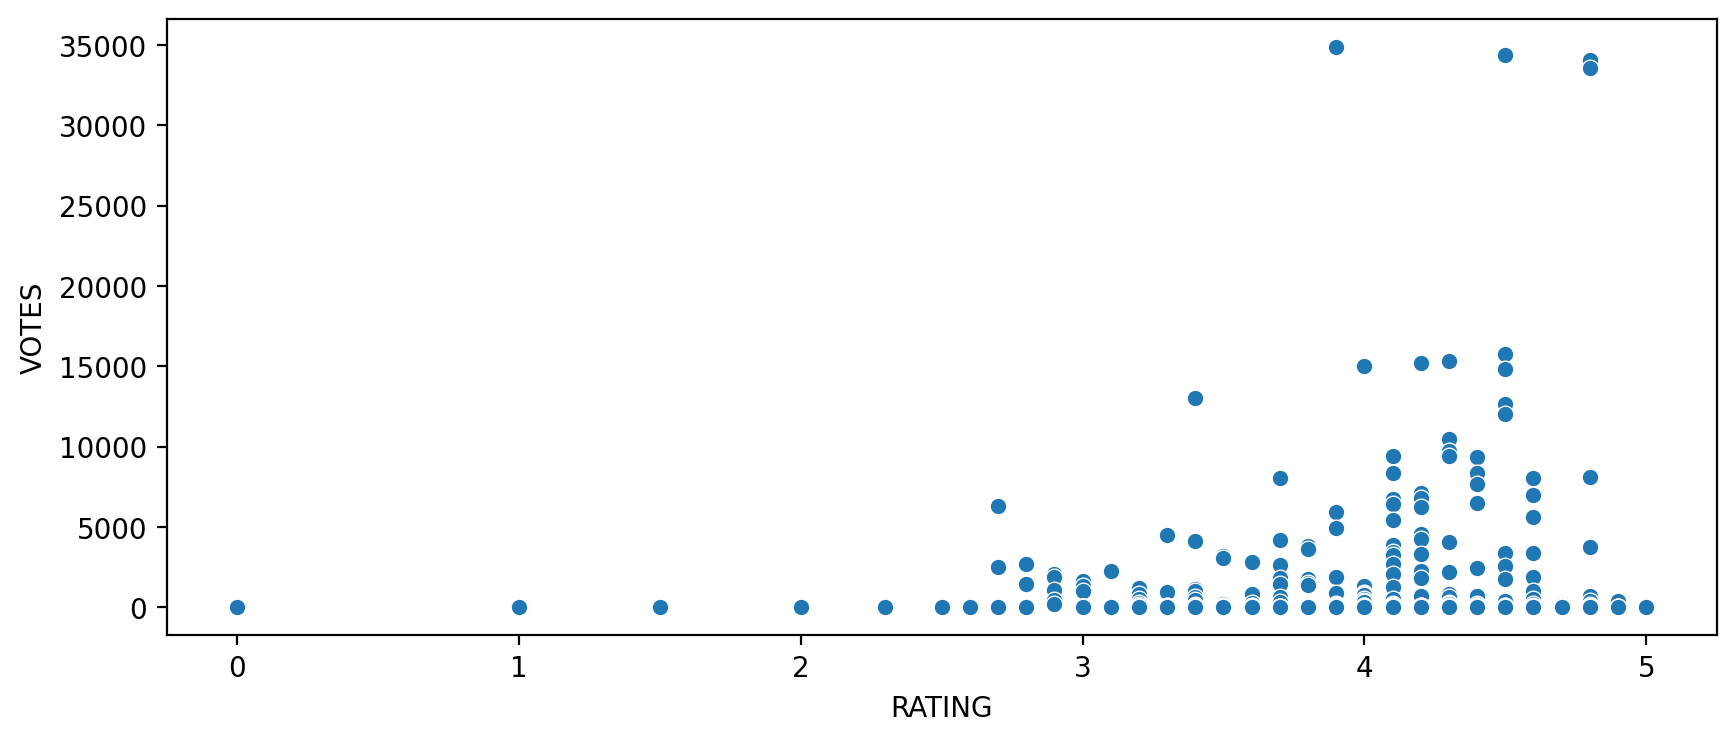

In [13]:
plt.figure(dpi=200, figsize=(10,4))
sns.scatterplot(data = fandango, x="RATING", y="VOTES")

**TASK: Calculate the correlation between columns:**

In [15]:
fandango.corr()

/var/folders/9c/4rybkddd4vj2kzsbky4568cr0000gn/T/ipykernel_1653/3624955426.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fandango.corr()


,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**ASSIGNMENT: Let's assume that each row in the FILM column contains a value in the following format:**

     Movie Title (Year)
    
**Create a new column, take only the year from the FILM row, and call this new column YEAR**

In [25]:
fandango['YEAR'] = fandango['FILM'].apply(lambda x : x[-5:-1])

**ASSIGNMENT: How many movies are in the Fandango dataset, broken down by year?**

In [28]:
fandango["YEAR"].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

**TASK: Visualize the number of films per year using a graph:**

<Axes: xlabel='YEAR', ylabel='count'>

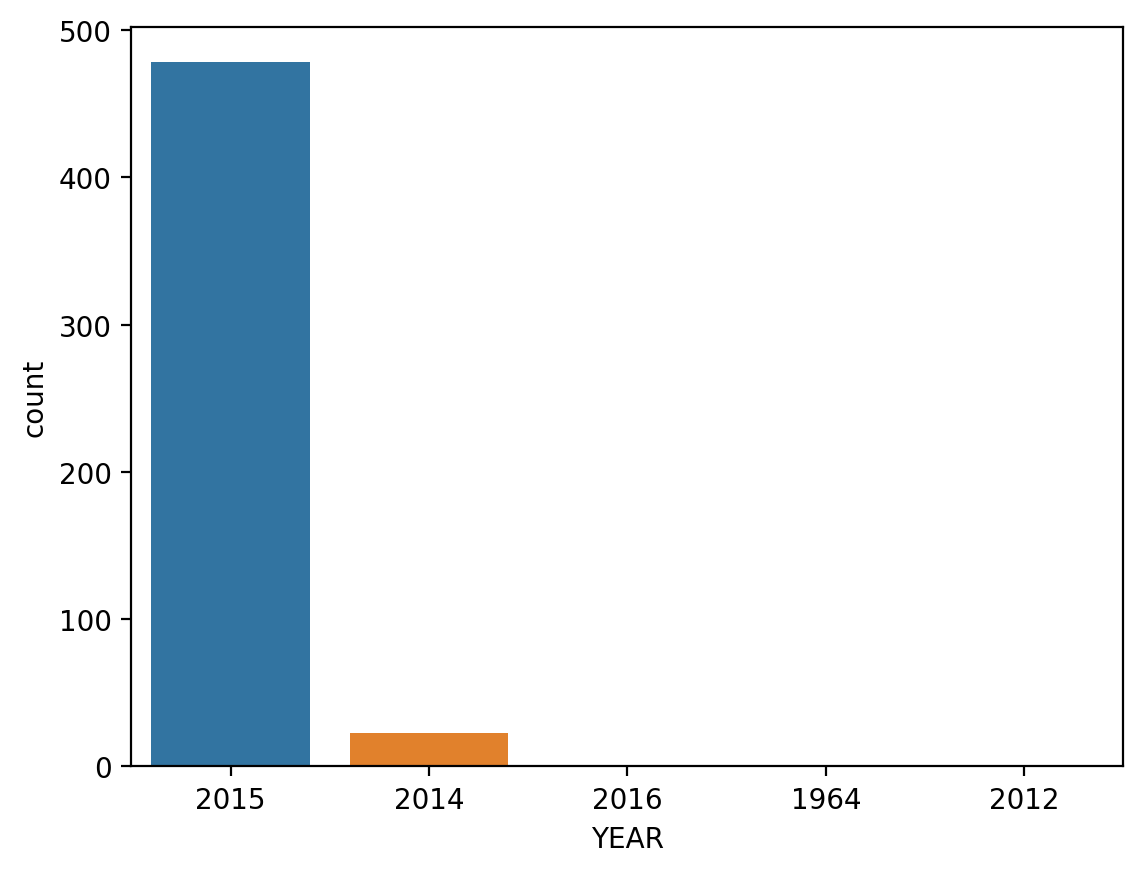

In [38]:
plt.figure(dpi=200)
sns.countplot(data=fandango,x="YEAR")

**TASK: Which 10 films received the most votes?**

In [50]:

fandango.sort_values(by="VOTES", axis=0, ascending=False).head(10)

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**Task: How many films have zero votes?**

In [54]:
fandango[fandango['VOTES']==0].count()[0]

69

**Task: Create a DataFrame with only those movies that have votes - that is, remove those movies that don't have any votes.**

In [8]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
fandango_raiting_only = fandango[fandango["VOTES"]>0]
fandango_raiting_only

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1
431,The Intern (2015),5.0,5.0,1
432,The Park Bench (2015),5.0,5.0,1
433,The Wanted 18 (2015),5.0,5.0,1


In [194]:
plt.figure(dpi=200, figsize=(10,4))
sns.kdeplot(data=fandango_raiting_only, x = "RATING", fill=True, clip=[0,5])
sns.kdeplot(data=fandango_raiting_only, x = "STARS", fill=True, clip=[0,5])

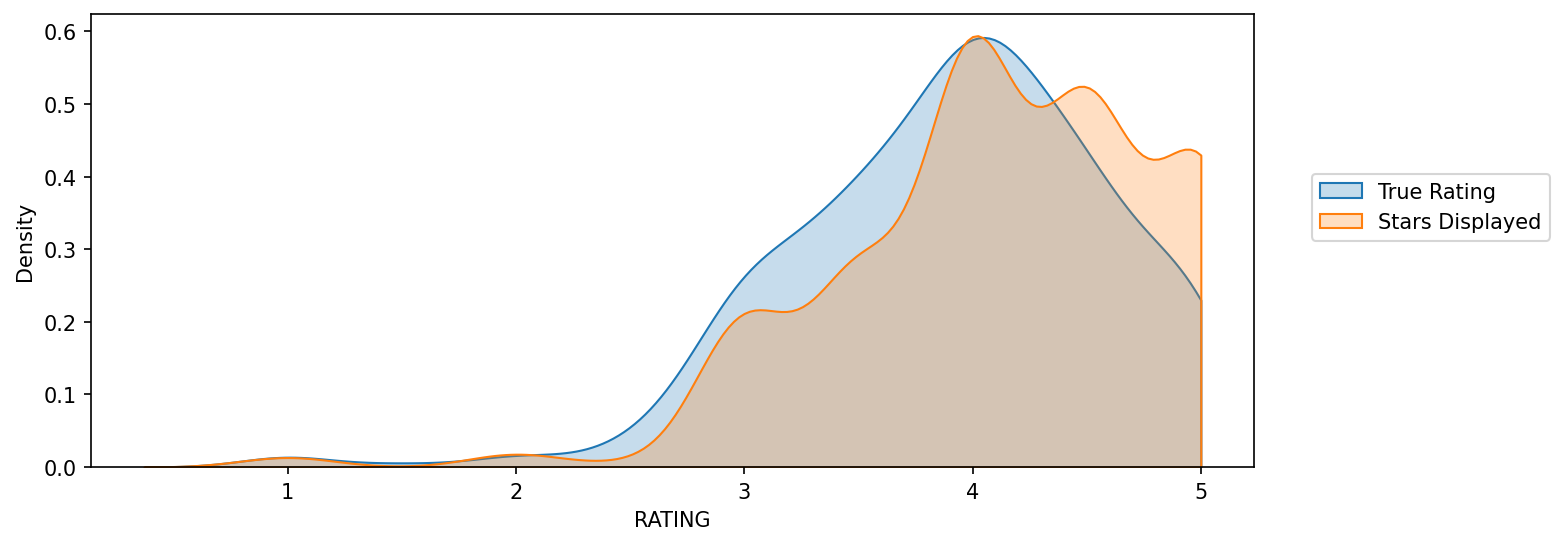

----

**Due to the way star ratings are displayed on HTML pages, actual user ratings may differ slightly from the ratings shown to the user. Let's visualize this difference in distributions.**

**ASSIGNMENT: Create a KDE plot (or several such plots) that displays the distribution of displayed ratings (STARS) and true ratings based on user votes (RATING). Trim the KDE range between 0-5.**

** TASK: Now let's calculate this difference numerically; Create a new column that stores the difference between the STARS and RATING columns using the usual STARS-RATING subtraction, and rounds to one decimal place.**

In [16]:
fandango['STARS_DIFF'] = round(fandango['STARS'] - fandango['RATING'], 1)
fandango

,FILM,STARS,RATING,VOTES,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,0.1
1,Jurassic World (2015),4.5,4.5,34390,0.0
2,American Sniper (2015),5.0,4.8,34085,0.2
3,Furious 7 (2015),5.0,4.8,33538,0.2
4,Inside Out (2015),4.5,4.5,15749,0.0
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,0.0
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,0.0
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,0.0
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,0.0


**TASK: Draw a count plot to show how many times a given value of the difference between STAR and RATING occurs:**

<Axes: xlabel='STARS_DIFF', ylabel='count'>

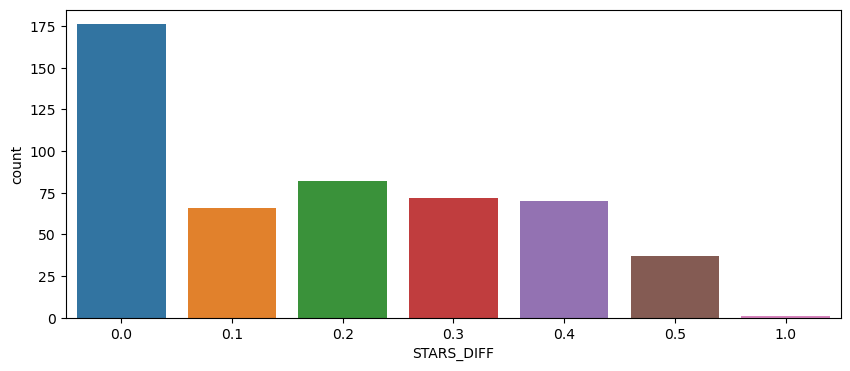

In [19]:
plt.figure(figsize=(10,4))
sns.countplot(data=fandango, x = 'STARS_DIFF')

**TASK: In this graph we can see that one of the movies has a 1 star difference between the displayed rating and the true rating! Find this movie.**

In [21]:
fandango[fandango["STARS_DIFF"] == 1]

,FILM,STARS,RATING,VOTES,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,1.0


## Part 3: Comparing Fandango's ratings with those of other companies

Let's take a look at how Fandango's ratings compare to those of other companies.

**ACTIVITY: Complete the cell below to download the file "all_sites_scores.csv"**

In [3]:
all_sites = pd.read_csv("all_sites_scores.csv")

**ACTIVITY: Examine the general properties of the resulting DataFrame object.**

In [23]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [24]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [25]:
all_sites.corr()

/var/folders/9c/4rybkddd4vj2kzsbky4568cr0000gn/T/ipykernel_1028/4260422768.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  all_sites.corr()


,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
RottenTomatoes,1.000000,0.781440,0.957360,0.754296,0.779671,0.111325,0.107083
RottenTomatoes_User,0.781440,1.000000,0.690998,0.687132,0.895297,0.198320,0.221776
Metacritic,0.957360,0.690998,1.000000,0.723459,0.727298,0.138184,0.114507
Metacritic_User,0.754296,0.687132,0.723459,1.000000,0.756265,0.121478,0.112580
IMDB,0.779671,0.895297,0.727298,0.756265,1.000000,0.205573,0.230058
Metacritic_user_vote_count,0.111325,0.198320,0.138184,0.121478,0.205573,1.000000,0.880635
IMDB_user_vote_count,0.107083,0.221776,0.114507,0.112580,0.230058,0.880635,1.000000


### Rotten Tomatoes ratings

Let's start with the Rotten Tomatoes ratings. There are two sets of ratings - ratings published by official critics and user ratings.

**ASSIGNMENT: Draw a scatterplot plotting the relationship between critic ratings and user ratings for Rotten Tomatoes.**

<Axes: xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

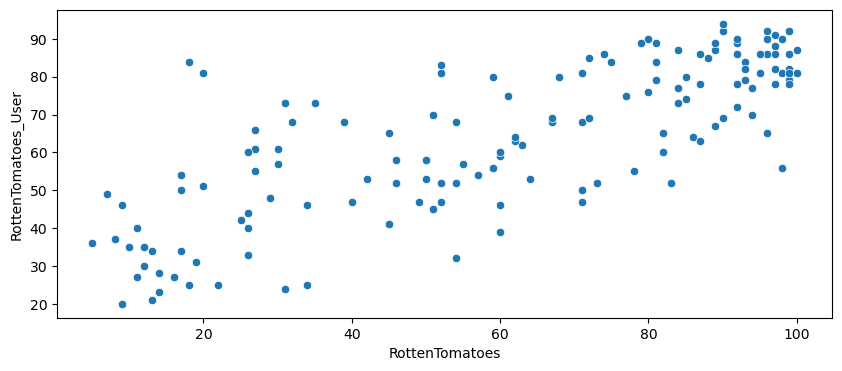

In [27]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=all_sites, x="RottenTomatoes", y='RottenTomatoes_User')

Let's examine the numerical difference between these two rankings. We will calculate this difference using the formula RottenTomatoes-RottenTomatoes_User. The resulting Rotten_Diff values are the critic rating minus the user rating. Values close to zero indicate that critics and users agree with each other. Large positive values - when critics rated the film much higher than users. And large negative values - on the contrary, users rated the film much higher than critics.

**TASK: Create a new column in which you save the difference between the critic rating and the user rating for Rotten Tomatoes. Use the formula RottenTomatoes-RottenTomatoes_User.**

In [5]:
all_sites['ROTEN_DIFF'] = all_sites['RottenTomatoes']-all_sites['RottenTomatoes_User']

In [6]:
def absolute(num):
    if num < 0:
        num * -1
        return num
    else:
        return num  

In [7]:
all_sites['ROTEN_DIFF_ABS'] = all_sites['ROTEN_DIFF'].apply(abs)
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,ROTEN_DIFF,ROTEN_DIFF_ABS
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,14
...,...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19,19


**TASK: Graph the distribution of the difference between critic ratings and user ratings for Rotten Tomatoes. There will be negative values on this graph. You can use both KDE and histograms to display this distribution.**

<Axes: xlabel='ROTEN_DIFF', ylabel='Count'>

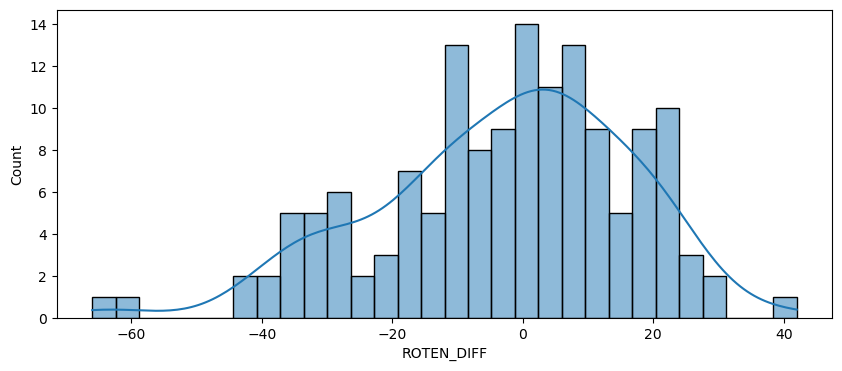

In [94]:
plt.figure(figsize=(10,4))
sns.histplot(data=all_sites, x='ROTEN_DIFF', kde=True,bins=30)

**TASK: Next, graph the distribution of the *absolute values* of the difference between critic ratings and user ratings for Rotten Tomatoes.**

<Axes: xlabel='ROTEN_DIFF_ABS', ylabel='Count'>

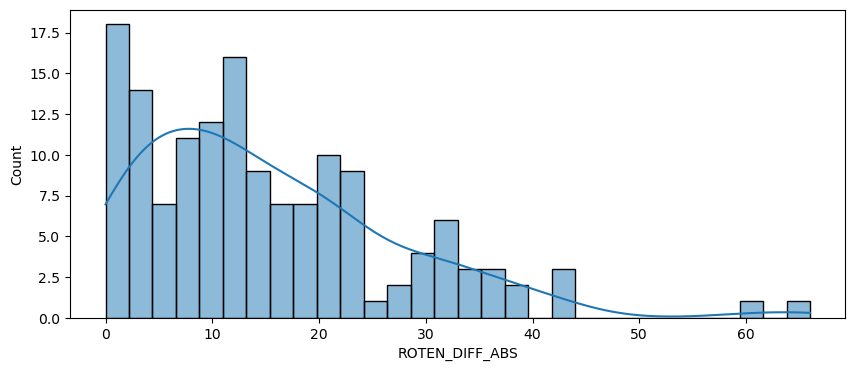

In [105]:
plt.figure(figsize=(10,4))
sns.histplot(data=all_sites, x='ROTEN_DIFF_ABS', kde=True,bins=30)

**Let's find out which films differ the most in ratings. First, print 5 movies with the largest absolute *negative* difference in ratings. Since we calculated the difference in ratings using the Critics Rating - Users Rating formula, large negative values indicate that users, on average, rated these films much higher than critics.**

**ASSIGNMENT: Which 5 films were rated highest on average by users, compared to ratings from critics:**

In [19]:
all_sites.sort_values('ROTEN_DIFF')[['FILM','ROTEN_DIFF']].head()

,FILM,ROTEN_DIFF
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


**TASK: Next, in reverse - display the 5 films that, on average, were rated highest by critics, compared to ratings from users.**

In [20]:
all_sites.sort_values('ROTEN_DIFF', ascending=False)[['FILM','ROTEN_DIFF']].head()

,FILM,ROTEN_DIFF
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


## Ratings from MetaCritic

Next, let's take a quick look at the ratings from MetaCritic. They also display two types of ratings - both their official ratings and user ratings.

**TASK: Draw a scatterplot to compare Metacritic and Metacritic User ratings.**

<Axes: xlabel='Metacritic', ylabel='Metacritic_User'>

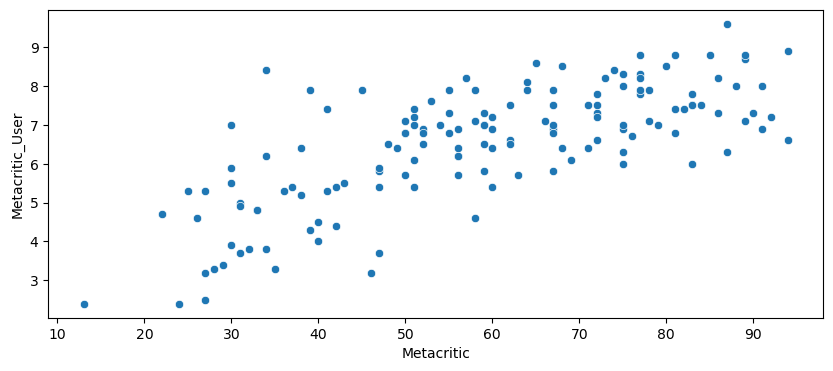

In [22]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=all_sites, x = "Metacritic", y="Metacritic_User")

## Ratings from IMDB

Finally, let's look at the ratings from IMDB. Please note that Metacritic and IMDB show the number of votes. Let's look at the most popular films.

**TASK: Draw a scatterplot to depict the relationship between the number of votes on MetaCritic and the number of votes on IMDB.**

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

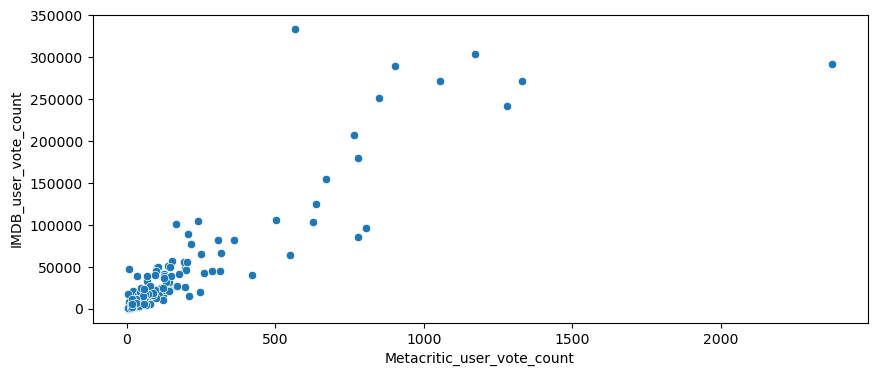

In [25]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=all_sites, x = "Metacritic_user_vote_count", y="IMDB_user_vote_count")

**Here we see two “outliers” - points that are very different from all other points. One movie received the most votes on IMDB, but only 500 votes on Metacritic. What kind of movie is this?**

**ACTIVITY: What movie received the most votes on IMDB?**

In [28]:
all_sites.sort_values("IMDB_user_vote_count", ascending=False).head(1)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,ROTEN_DIFF,ROTEN_DIFF_ABS
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2,2


**ACTIVITY: What movie received the most votes on Metacritic?**

In [29]:
all_sites.sort_values("Metacritic_user_vote_count", ascending=False).head(1)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,ROTEN_DIFF,ROTEN_DIFF_ABS
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9,9


### Normalize columns to range 0-5 according to Fandango's STARS and RATINGS columns

Please note that Rotten Tomatoes, Metacritic and IMDB use a different rating scale than Fandango's 0-5 star scale. To make comparisons, we need to *normalize* these values so that they fall within the range of 0 to 5 stars.

**Task: Add additional columns to all_sites, and record in them the normalized rating values from 0 to 5. This can be done in different ways.**

As a hint, you can read this article: https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame


Another tip is a simple way to convert ratings:
* 100/20 = 5
* 10/2 = 5

In [94]:
all_data['RT_NORM'] = all_data['RottenTomatoes'].apply(lambda x : round(x/20, 1))
all_data['RT_U_NORM'] = all_data['RottenTomatoes_User'].apply(lambda x : round(x/20, 1))
all_data['Metacritic_NORM'] = all_data['Metacritic'].apply(lambda x : round(x/20, 1))
all_data['Metacritic_U_NORM'] = all_data['Metacritic_User'].apply(lambda x : round(x/2, 1))
all_data['IMDB_NORM'] = all_data['IMDB'].apply(lambda x : round(x/2, 1))

In [89]:
all_data

,FILM,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,ROTEN_DIFF,ROTEN_DIFF_ABS,RT_NORM,RT_U_NORM,Metacritic_NORM,Metacritic_U_NORM,IMDB_NORM
0,Fifty Shades of Grey (2015),4.0,3.9,34846,25,42,46,3.2,4.2,778,179506,-17,17,1.25,2.10,2.30,1.60,2.10
1,Jurassic World (2015),4.5,4.5,34390,71,81,59,7.0,7.3,1281,241807,-10,10,3.55,4.05,2.95,3.50,3.65
2,American Sniper (2015),5.0,4.8,34085,72,85,72,6.6,7.4,850,251856,-13,13,3.60,4.25,3.60,3.30,3.70
3,Furious 7 (2015),5.0,4.8,33538,81,84,67,6.8,7.4,764,207211,-3,3,4.05,4.20,3.35,3.40,3.70
4,Inside Out (2015),4.5,4.5,15749,98,90,94,8.9,8.6,807,96252,8,8,4.90,4.50,4.70,4.45,4.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,87,63,68,6.4,6.7,19,5289,24,24,4.35,3.15,3.40,3.20,3.35
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,95,81,87,6.3,7.0,18,1107,14,14,4.75,4.05,4.35,3.15,3.50
142,The Wrecking Crew (2015),4.5,4.2,38,93,84,67,7.0,7.8,4,732,9,9,4.65,4.20,3.35,3.50,3.90
143,Tangerine (2015),4.0,3.9,36,95,86,86,7.3,7.4,14,696,9,9,4.75,4.30,4.30,3.65,3.70


**TASK: Next, create a DataFrame called norm_scores, in which you will leave only the normalized ratings. Also keep the STARS and RATING columns from the original fandango table.**

In [40]:
norm_scores = all_data[['STARS', 'RATING', "RT_NORM",'RT_U_NORM','Metacritic_NORM',
                        'Metacritic_U_NORM', 'IMDB_NORM']]

In [41]:
norm_scores

,STARS,RATING,RT_NORM,RT_U_NORM,Metacritic_NORM,Metacritic_U_NORM,IMDB_NORM
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.5,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.5,4.3
...,...,...,...,...,...,...,...
140,3.5,3.5,4.3,3.1,3.4,3.2,3.4
141,4.0,3.6,4.8,4.0,4.3,3.1,3.5
142,4.5,4.2,4.7,4.2,3.4,3.5,3.9
143,4.0,3.9,4.8,4.3,4.3,3.6,3.7


### Comparison of rating distributions from different companies


And now the moment of truth! Was Fandango really showing unreasonably high ratings? We already know that the RATING values displayed were higher than the STARS values. But are the ratings themselves, on average, higher than those of other companies?


**ASSIGNMENT: Draw a graph comparing the distributions of normalized ratings from all companies. This can be done in many ways, but try using Seaborn KDEplot (check the documentation). Don't worry if your graph looks a little different from our example. The main thing is that the differences between individual distributions are visible.**

p.s. if you need to move the legend on the seaborn kdeplot chart, you can do it like this: https://github.com/mwaskom/seaborn/issues/2280

In [57]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

/var/folders/9c/4rybkddd4vj2kzsbky4568cr0000gn/T/ipykernel_1051/3875146607.py:4: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = old_legend.legendHandles


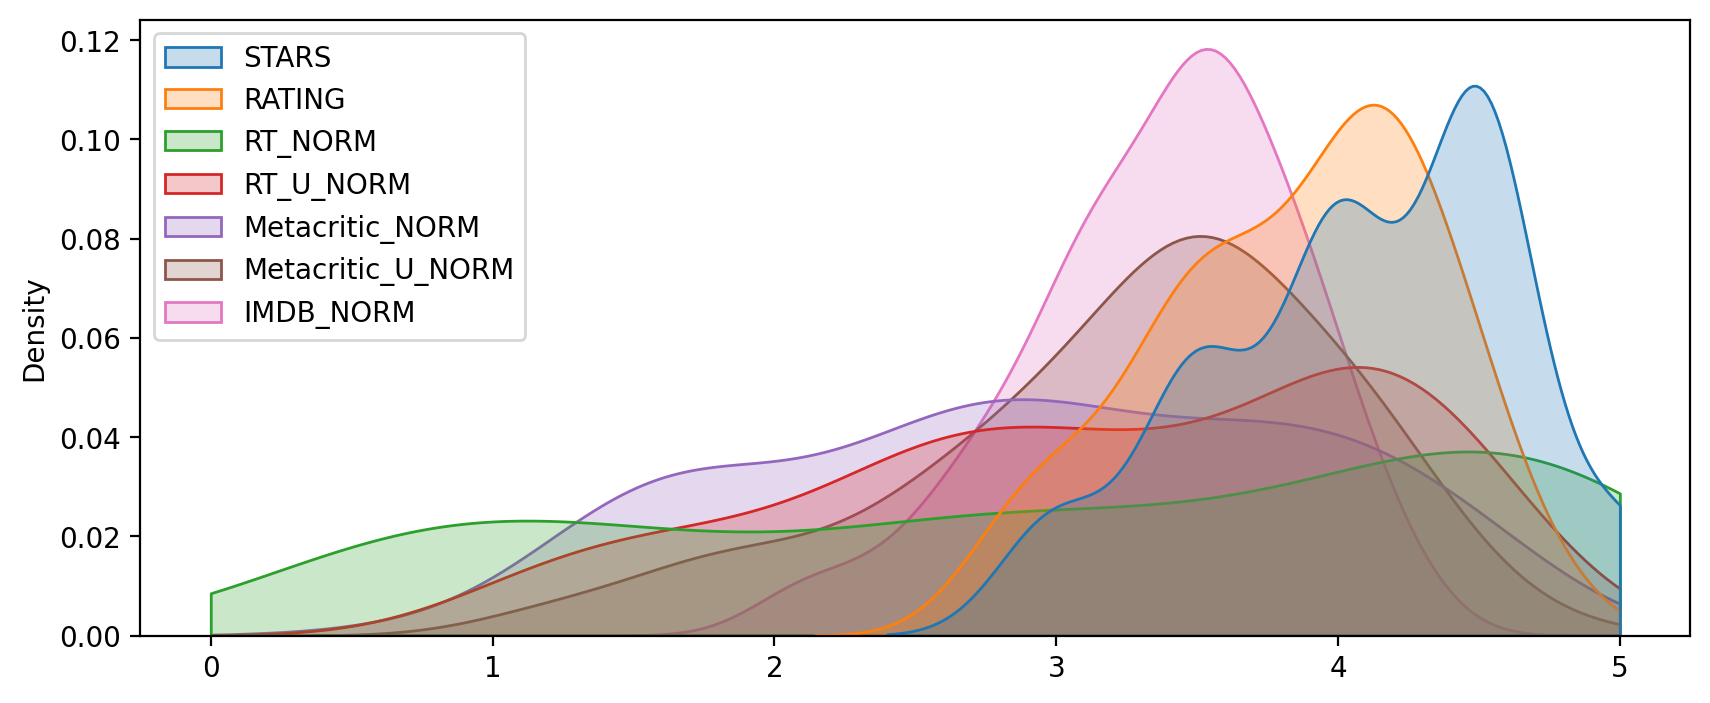

In [62]:
fig, ax = plt.subplots(figsize=(10,4), dpi=200)
sns.kdeplot(data=norm_scores, fill=True, clip=(0,5))
move_legend(ax, "upper left")

**We can immediately see that Fandango's ratings are very skewed to the right. It is also interesting that RT ratings from critics have a very flat distribution. Let's compare just these two distributions.**

**TASK: Draw a KDE plot comparing the distribution of Rotten Tomatoes ratings from critics and the distribution of STARS ratings from Fandango.**

<Axes: ylabel='Density'>

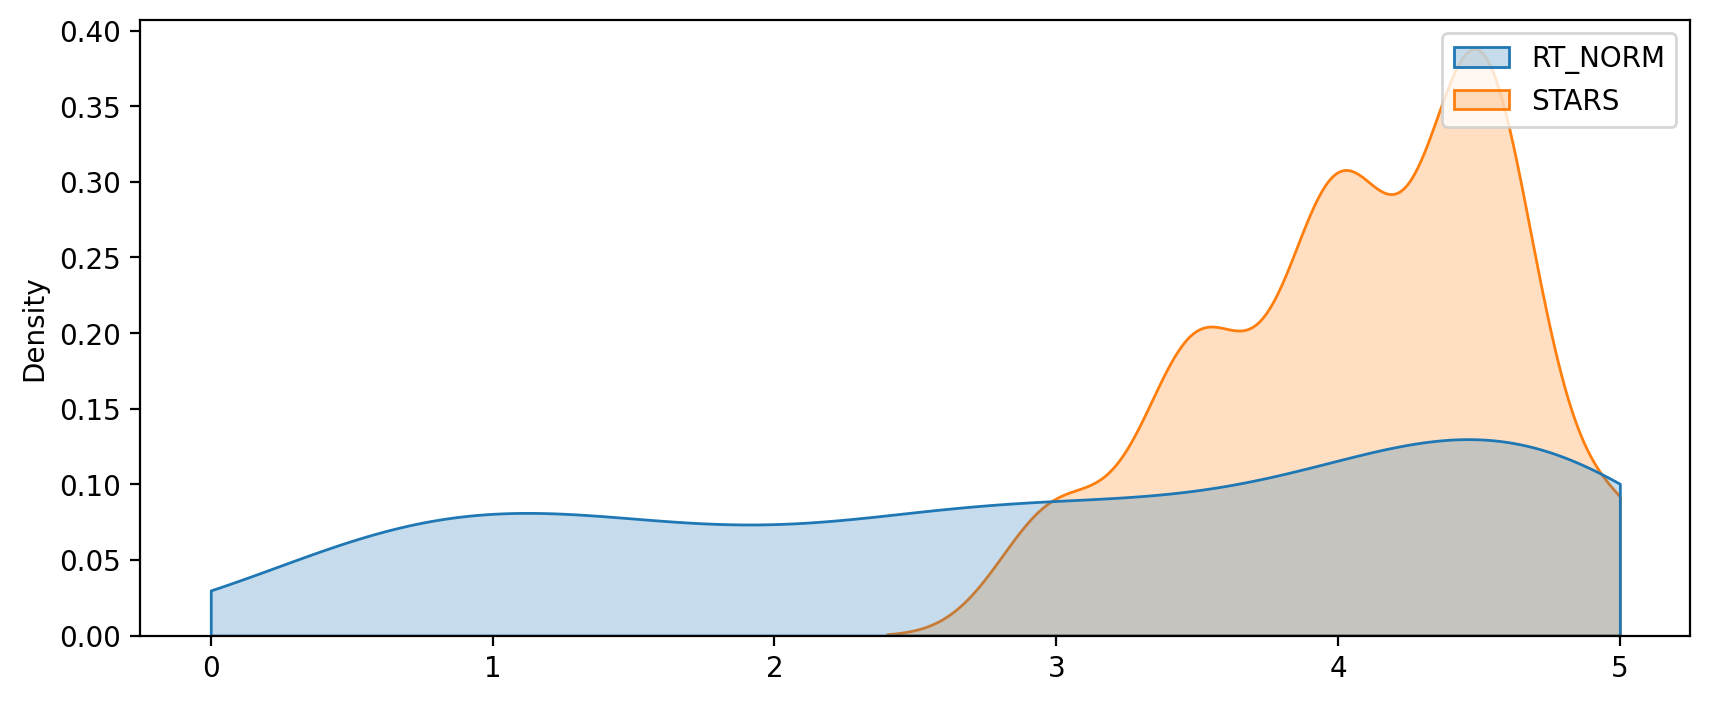

In [64]:
plt.figure(figsize=(10,4), dpi=200)
sns.kdeplot(data=norm_scores[['RT_NORM','STARS']], fill=True, clip=(0,5))


**OPTIONAL ASSIGNMENT: Draw a histplot comparing all normalized ratings.**

<Axes: ylabel='Count'>

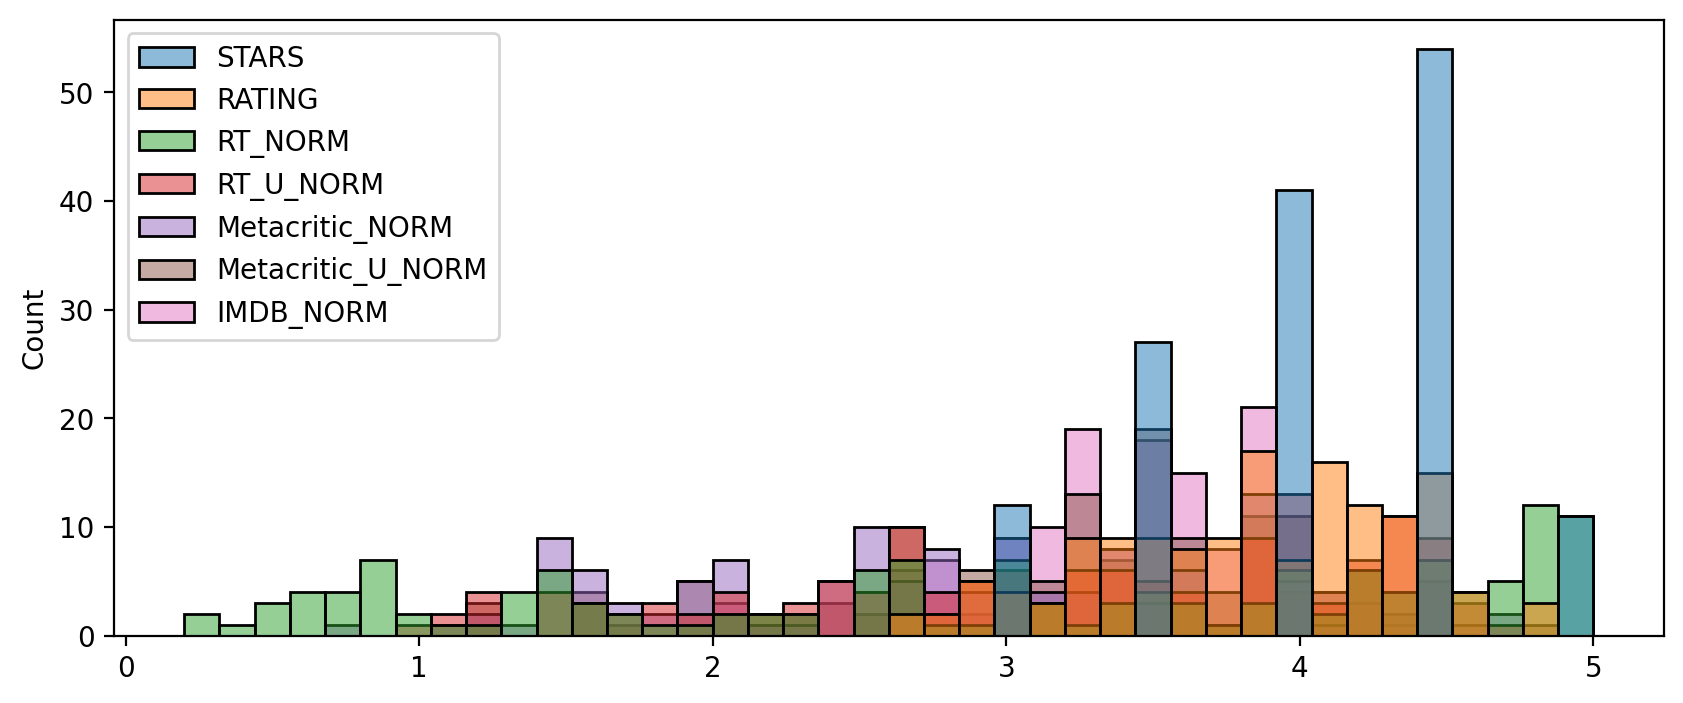

In [67]:
plt.figure(figsize=(10,4), dpi=200)
sns.histplot(data=norm_scores, bins=40)

### How do different companies rate the lowest-rated films?

**ASSIGNMENT: Draw a clustermap plot for all normalized ratings. Please note the differences in ratings between different companies. Films with high ratings should fall into some clusters, and films with low ratings into other clusters. Note: This clustermap does not require the FILM column as an index, so you can remove this column before building the clustermap if you wish.**

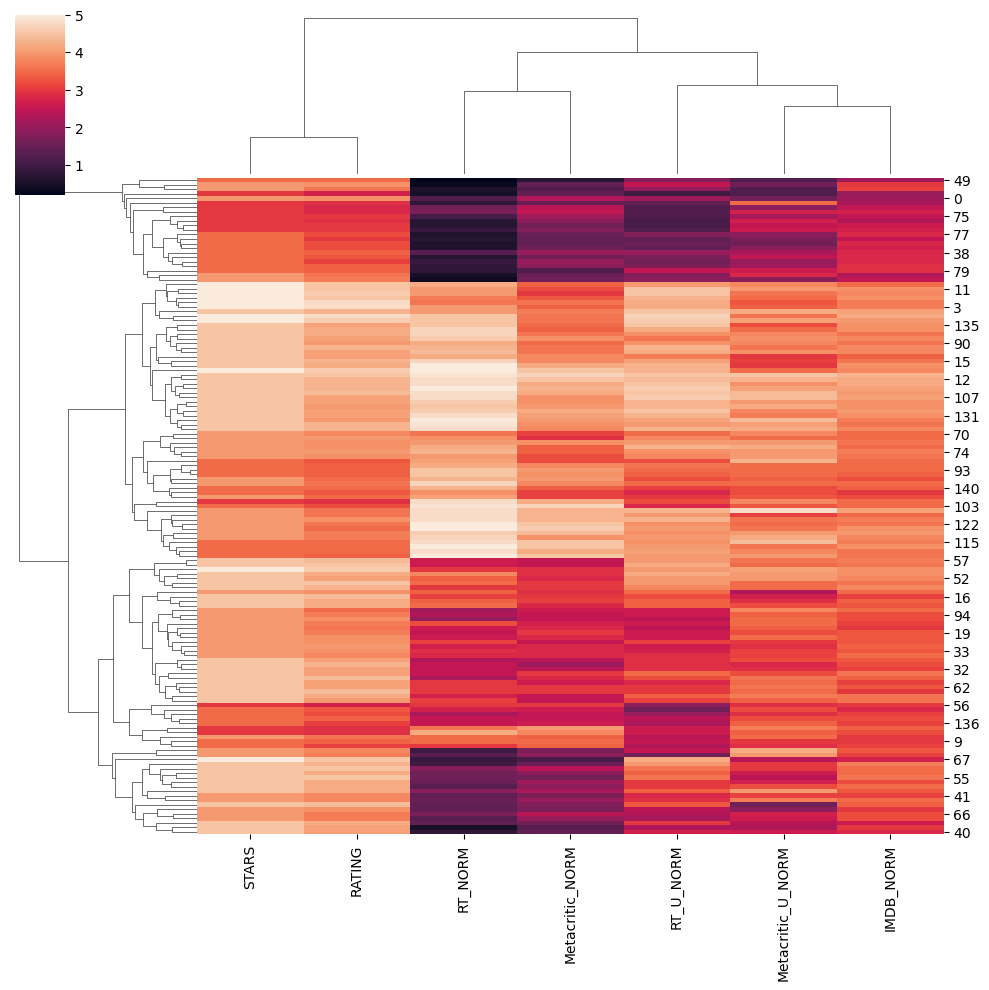

In [77]:
sns.clustermap(data=norm_scores)

**TASK: We've seen that Fandango's ratings are clearly higher than other companies' ratings, especially when looking at the rounded-up ratings. Let's take a look at the 10 worst-rated films according to Rotten Tomatoes Critic - which 10 films are they? What normalized ratings have other companies given these films? You may need the FILM column, so if you removed it, add that column back.**

In [95]:
norm_scores = all_data[['STARS', 'RATING', "RT_NORM",'RT_U_NORM','Metacritic_NORM',
                        'Metacritic_U_NORM', 'IMDB_NORM', 'FILM']]

In [101]:
norm_scores_1 = norm_scores.sort_values('RT_NORM').head(10)

**FINAL TASK: Visualize the distribution of ratings from all companies for the 10 worst rated films.**

<Axes: ylabel='Density'>

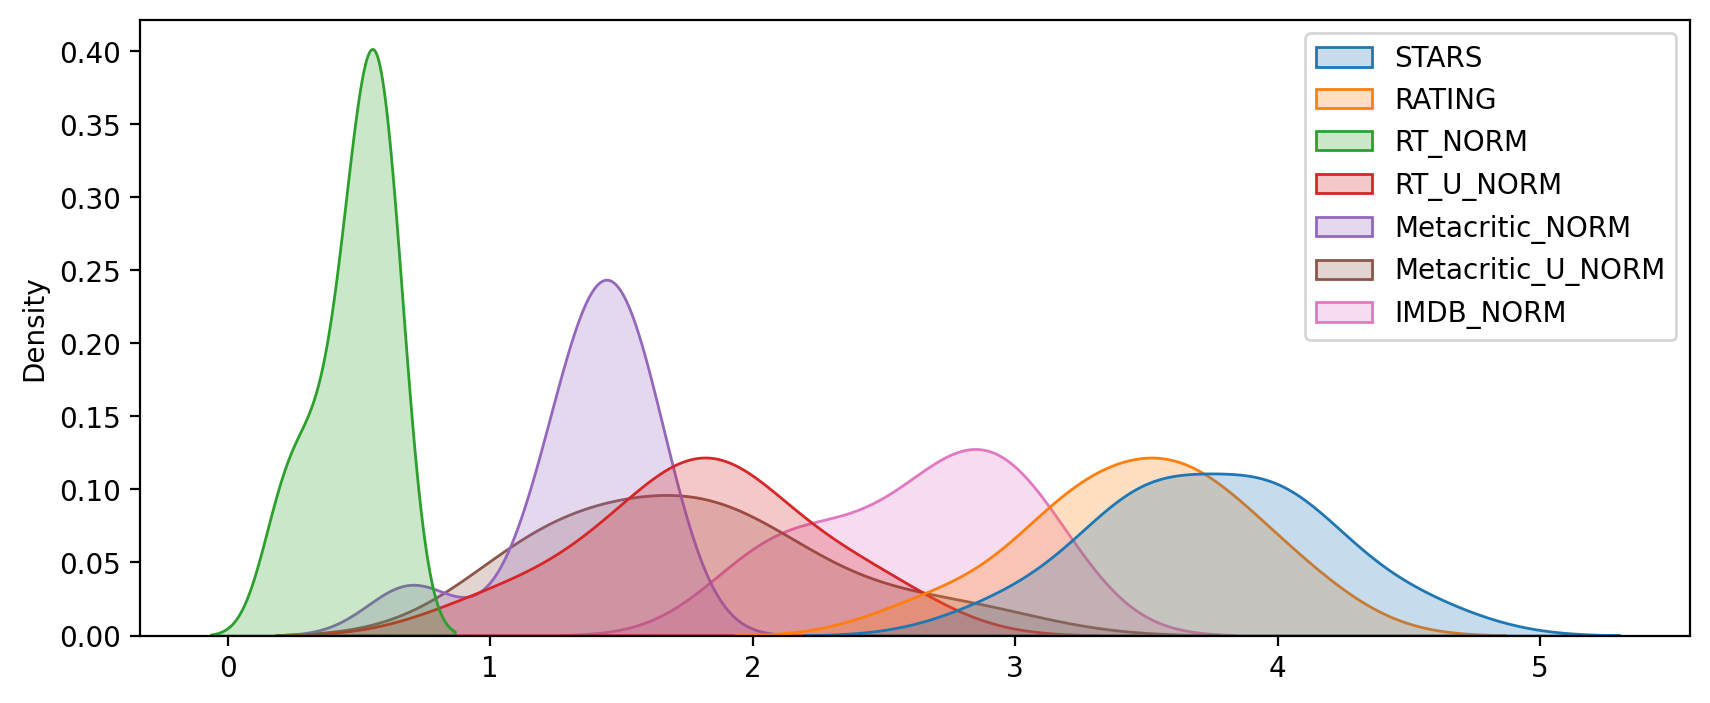

In [102]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
plt.figure(figsize=(10,4), dpi=200)
sns.kdeplot(data=norm_scores_1, fill=True)

---
----

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">
  
**Conclusions: wow! Fandango was showing 3-4 stars for movies that were clearly failures!**
    
**The movie that stands out the most is [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0) - Fandango gave it a 4.5 star rating, although this movie received [1.86 average rating](https:// en.wikipedia.org/wiki/Taken_3#Critical_response) from other companies!**

In [253]:
norm_films.iloc[25]

STARS                     4.5
RATING                    4.1
RT_Norm                   0.4
RTU_Norm                  2.3
Meta_Norm                 1.3
Meta_U_Norm               2.3
IMDB_Norm                   3
FILM           Taken 3 (2015)
Name: 25, dtype: object

In [254]:
0.4+2.3+1.3+2.3+3

9.3

In [255]:
9.3/5

1.86

----